In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Generacion Fotovoltaica

In [37]:
df_gen = pd.read_csv('dataset\Generacion_fotovoltaica.csv')

df_gen['FECHA'] = pd.to_datetime(df_gen['FECHA'])

df_gen.head()


,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,NaN
1,2023-07-24 12:00:00,115.66
2,2023-07-24 13:00:00,129.98
3,2023-07-24 14:00:00,134.35
4,2023-07-24 15:00:00,133.90


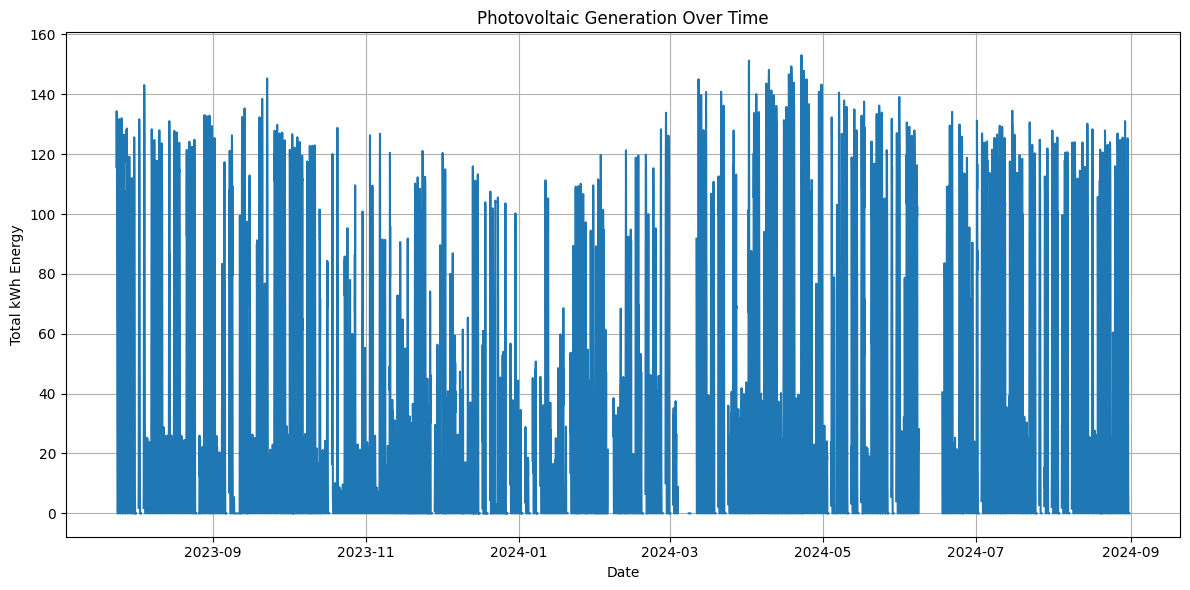

In [24]:
# Convert FECHA to datetime
df_gen['FECHA'] = pd.to_datetime(df_gen['FECHA'])

# Set FECHA as index for time series plotting
df_gen_indexed = df_gen.set_index('FECHA')

# Create a time series plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_gen_indexed['TOTAL_KWH_ENERGIA'])
plt.title('Photovoltaic Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Total kWh Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create an interactive time series plot using Plotly
fig = px.line(df_gen, x='FECHA', y='TOTAL_KWH_ENERGIA', 
              title='Photovoltaic Generation Over Time (Interactive)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total kWh Energy')
fig.show()





Total null values in the dataset:
FECHA                   0
TOTAL_KWH_ENERGIA    1164
dtype: int64


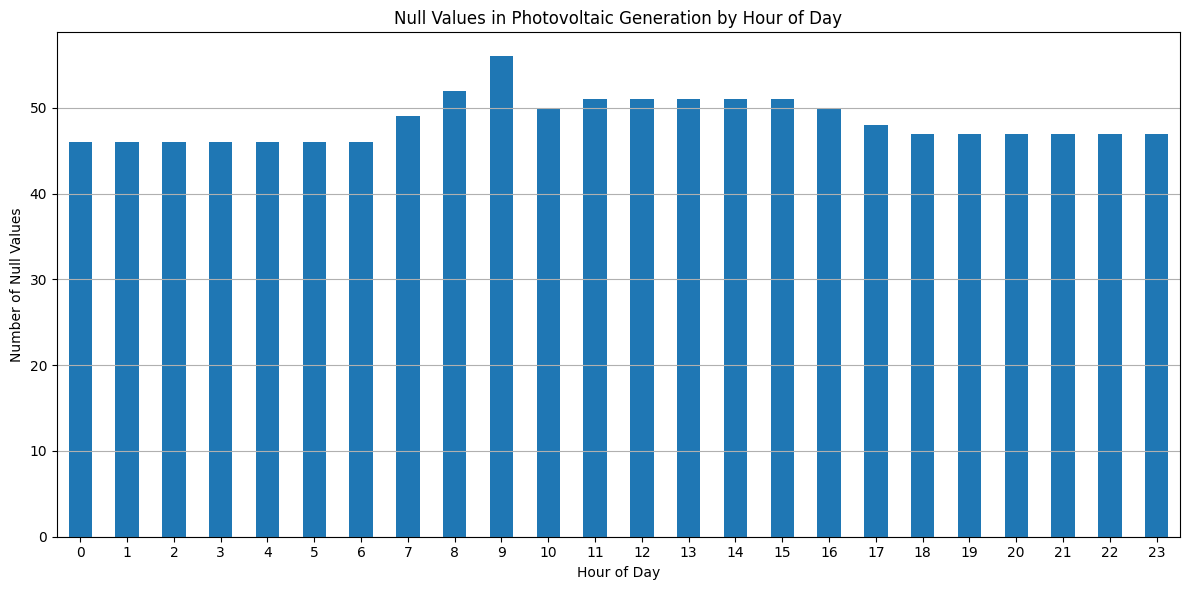


Null values by hour of day:
hour
0     46
1     46
2     46
3     46
4     46
5     46
6     46
7     49
8     52
9     56
10    50
11    51
12    51
13    51
14    51
15    51
16    50
17    48
18    47
19    47
20    47
21    47
22    47
23    47
Name: TOTAL_KWH_ENERGIA, dtype: int64


In [39]:
# Check for null values in the photovoltaic generation data
null_counts = df_gen.isnull().sum()
print("Total null values in the dataset:")
print(null_counts)

# Group by hour of day to see if nulls occur at specific times
df_gen['hour'] = df_gen['FECHA'].dt.hour
null_by_hour = df_gen.groupby('hour')['TOTAL_KWH_ENERGIA'].apply(lambda x: x.isnull().sum())

# Create a bar chart to visualize nulls by hour
plt.figure(figsize=(12, 6))
null_by_hour.plot(kind='bar')
plt.title('Null Values in Photovoltaic Generation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the tabular data of nulls by hour
print("\nNull values by hour of day:")
print(null_by_hour)

# Remove the temporary hour column
df_gen.drop('hour', axis=1, inplace=True)





Mean kWh Generated per Hour of Day:
 hour  TOTAL_KWH_ENERGIA
    0           0.003128
    1          -0.003520
    2           0.000000
    3           0.000000
    4           0.000000
    5           0.000000
    6           0.000000
    7           0.023549
    8           1.183267
    9           7.760632
   10          28.695621
   11          50.621836
   12          69.027119
   13          78.345480
   14          80.106723
   15          76.471158
   16          71.214479
   17          60.665686
   18          44.756648
   19          26.658156
   20          12.578520
   21           2.978687
   22           0.285475
   23          -0.005559


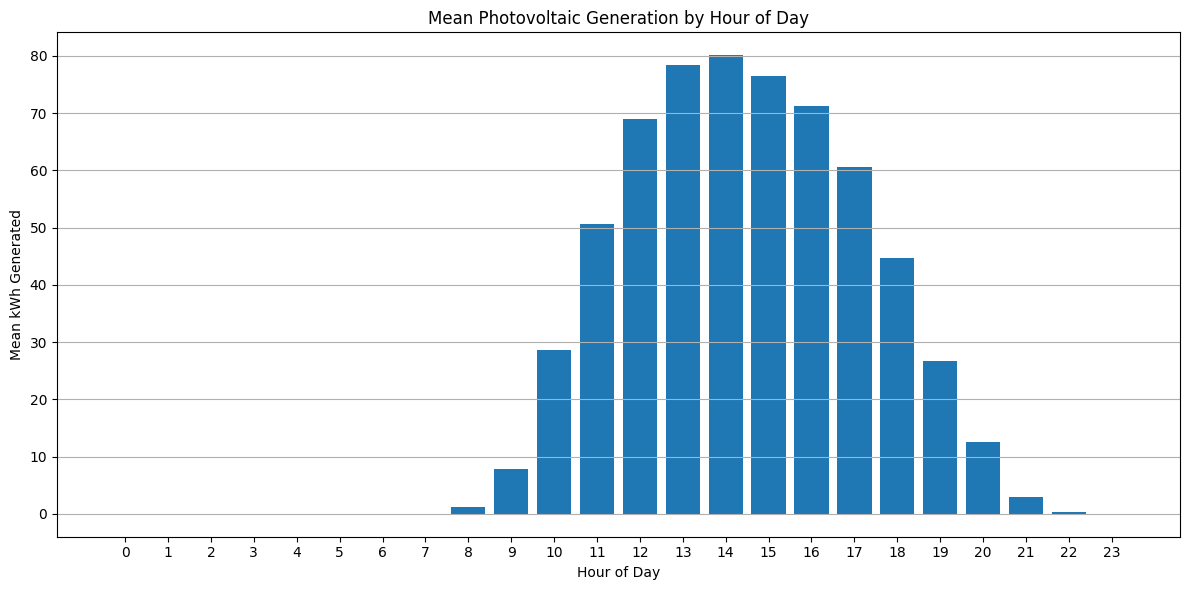

In [40]:
# Calculate the mean of kWh generated per hour of day
df_gen['hour'] = df_gen['FECHA'].dt.hour
mean_by_hour = df_gen.groupby('hour')['TOTAL_KWH_ENERGIA'].mean().reset_index()

# Display the mean kWh generated per hour in a table
print("Mean kWh Generated per Hour of Day:")
print(mean_by_hour.to_string(index=False))

# Create a bar chart to visualize mean generation by hour
plt.figure(figsize=(12, 6))
plt.bar(mean_by_hour['hour'], mean_by_hour['TOTAL_KWH_ENERGIA'])
plt.title('Mean Photovoltaic Generation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean kWh Generated')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Remove the temporary hour column
df_gen.drop('hour', axis=1, inplace=True)


WE CAN DEFINE NULLS WITH THE MEAN

In [26]:
df_foto = pd.read_csv('dataset\Consumo_fotovoltaica.csv')

df_foto.sort_values(by='FECHA', inplace=True)

df_foto.tail()


,FECHA,TOTAL_KWH_ENERGIA
1123,2024-10-17 19:00:00+02:00,16.43
1124,2024-10-17 20:00:00+02:00,1.11
1125,2024-10-17 21:00:00+02:00,-0.13
1126,2024-10-17 22:00:00+02:00,0.00
1127,2024-10-17 23:00:00+02:00,0.00


# WEATHER

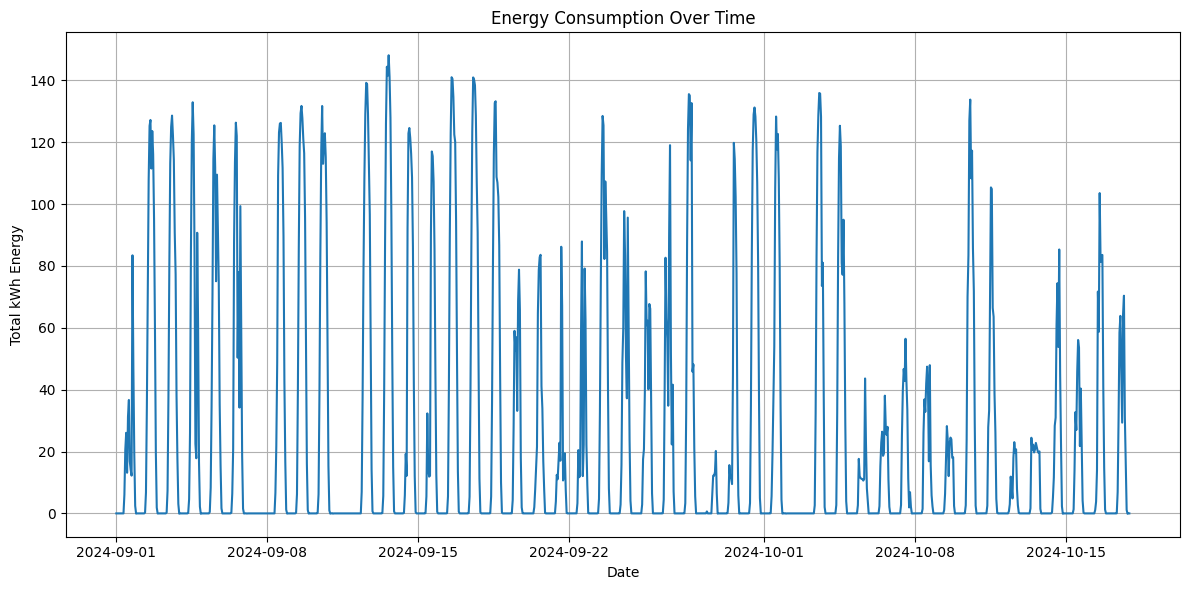

In [27]:
# Convert FECHA to datetime
df_foto['FECHA'] = pd.to_datetime(df_foto['FECHA'])

# Set FECHA as index for time series plotting
df_foto_indexed = df_foto.set_index('FECHA')

# Create a time series plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_foto_indexed['TOTAL_KWH_ENERGIA'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total kWh Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create an interactive time series plot using Plotly
fig = px.line(df_foto, x='FECHA', y='TOTAL_KWH_ENERGIA', 
              title='Energy Consumption Over Time (Interactive)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total kWh Energy')
fig.show()


In [28]:
df_consumo = pd.read_csv('dataset\Consumo.csv')

df_consumo.head()


,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,506.012634
1,2023-07-24 12:00:00,456.551453
2,2023-07-24 13:00:00,395.318604
3,2023-07-24 14:00:00,330.052979
4,2023-07-24 15:00:00,183.146606


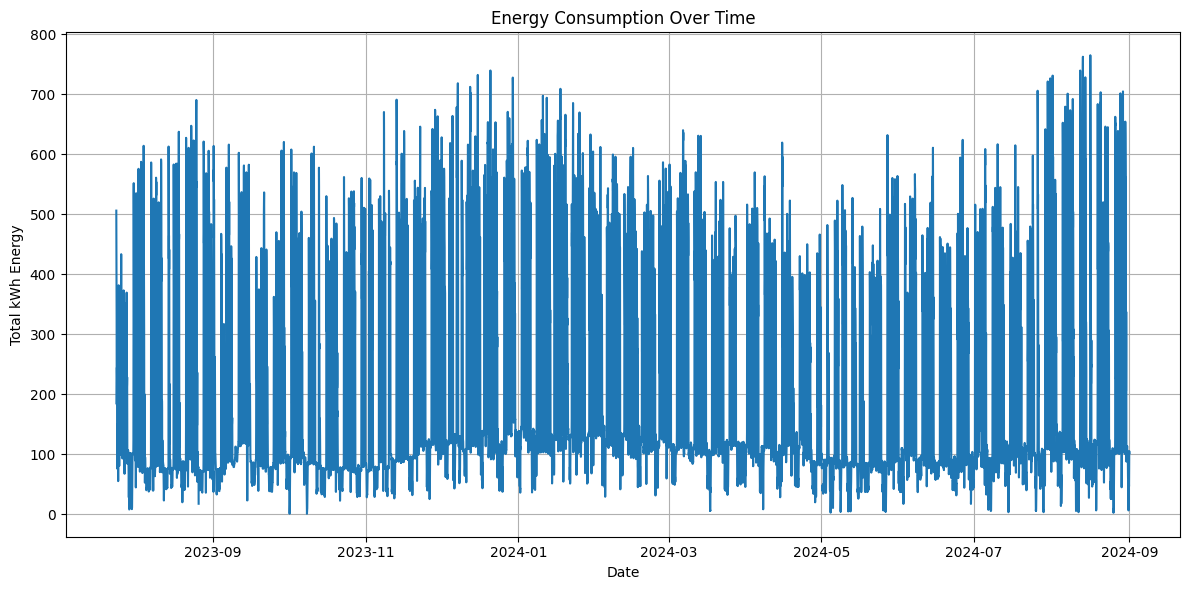

In [29]:
# Convert FECHA to datetime
df_consumo['FECHA'] = pd.to_datetime(df_consumo['FECHA'])

# Set FECHA as index for time series plotting
df_consumo_indexed = df_consumo.set_index('FECHA')

# Create a time series plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_consumo_indexed['TOTAL_KWH_ENERGIA'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total kWh Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create an interactive time series plot using Plotly
fig = px.line(df_consumo, x='FECHA', y='TOTAL_KWH_ENERGIA', 
              title='Energy Consumption Over Time (Interactive)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total kWh Energy')
fig.show()


In [30]:
gen_foto = pd.read_csv('dataset\Generacion_fotovoltaica.csv')

gen_foto.head()

,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,NaN
1,2023-07-24 12:00:00,115.66
2,2023-07-24 13:00:00,129.98
3,2023-07-24 14:00:00,134.35
4,2023-07-24 15:00:00,133.90


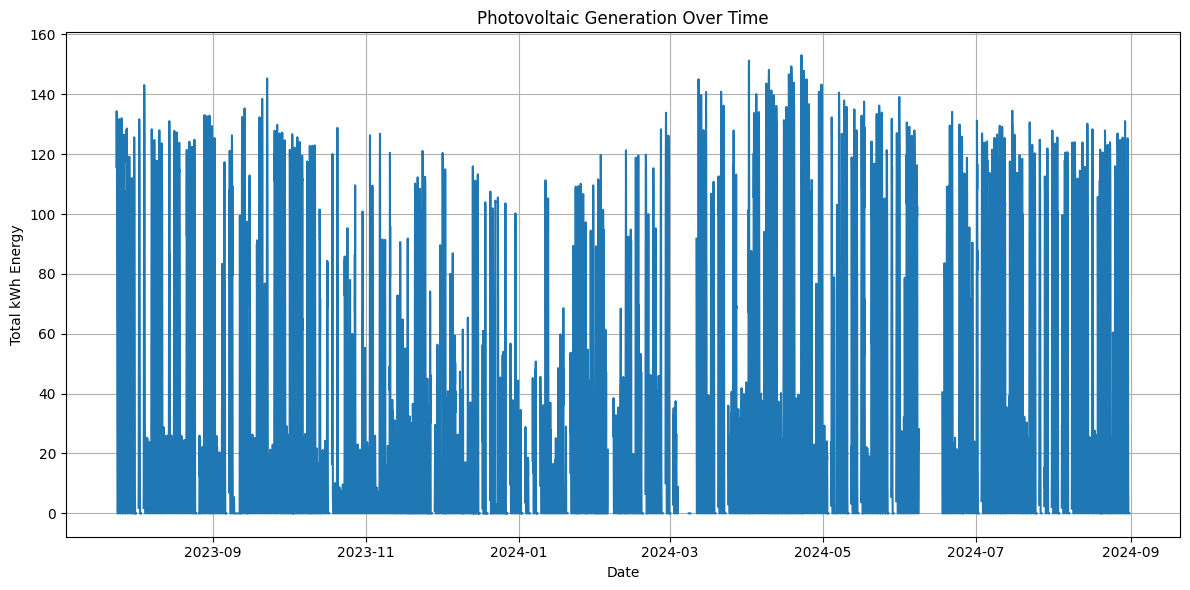

In [31]:
# Convert FECHA to datetime format
gen_foto['FECHA'] = pd.to_datetime(gen_foto['FECHA'])

# Set FECHA as index for time series plotting
gen_foto_indexed = gen_foto.set_index('FECHA')

# Create a time series plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(gen_foto_indexed['TOTAL_KWH_ENERGIA'])
plt.title('Photovoltaic Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Total kWh Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create an interactive time series plot using Plotly
fig = px.line(gen_foto, x='FECHA', y='TOTAL_KWH_ENERGIA', 
              title='Photovoltaic Generation Over Time (Interactive)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total kWh Energy')
fig.show()


In [32]:
metereo = pd.read_csv('dataset\Meteorologia.csv')

metereo.head()

,FORECAST_TIMESTAMP,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,...,spsurface_0,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80
0,2023-07-24 11:00:00+00:00,40.0,-4.0,6.989717,1.524463,19.6,0.005070,301.667859,18000.0,300.244031,...,95095.853125,0.8,298.878662,301.632129,291.701489,324.006396,0.0,316.100012,7.979102,1.763457
1,2023-07-24 12:00:00+00:00,40.0,-4.0,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,...,95033.793750,1.7,300.500000,303.363452,291.701489,325.803369,0.0,318.700000,8.801675,1.623066
2,2023-07-24 13:00:00+00:00,40.0,-4.0,8.506143,1.294370,18.2,0.005665,304.854614,3600.0,302.703198,...,94955.268750,8.8,301.995581,304.815100,303.400000,326.096606,0.0,319.277295,9.977305,1.662959
3,2023-07-24 14:00:00+00:00,40.0,-4.0,9.392205,1.283123,17.4,0.005709,305.681506,7200.0,303.544031,...,94899.959375,5.0,302.944043,305.689685,303.400000,326.790967,0.0,318.515942,11.152161,1.711703
4,2023-07-24 15:00:00+00:00,40.0,-4.0,10.167048,1.555879,18.3,0.006080,305.976172,10800.0,303.834607,...,94838.475000,35.8,303.432275,305.995581,303.400000,329.955933,0.0,316.435266,12.256921,2.011133


# MERGING ES_2023 AND ES_2024

In [33]:
es_2023 = pd.read_csv('dataset\ES_2023_hourly.csv')
es_2024 = pd.read_csv('dataset\ES_2024_hourly.csv')

In [34]:
# Ensure both dataframes have consistent datetime column names
# The outputs show that both have 'Datetime (UTC)' column
es_2023.rename(columns={'Datetime (UTC)': 'datetime'}, inplace=True)
es_2024.rename(columns={'Datetime (UTC)': 'datetime'}, inplace=True)

# Convert datetime columns to datetime format for proper merging
es_2023['datetime'] = pd.to_datetime(es_2023['datetime'])
es_2024['datetime'] = pd.to_datetime(es_2024['datetime'])

# Concatenate the two dataframes to create es_total
es_total = pd.concat([es_2023, es_2024], ignore_index=True)

# Sort the combined dataframe by datetime
es_total = es_total.sort_values('datetime')

# Display the first few rows of the merged dataframe
print("Merged dataframe (es_total) shape:", es_total.shape)
es_total.head()


Merged dataframe (es_total) shape: (17544, 11)


,datetime,Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2023-01-01 00:00:00,Spain,Spain,ES,79.49,110.37,84.15,50.75,entsoe.eu,False,NaN
1,2023-01-01 01:00:00,Spain,Spain,ES,82.59,113.77,83.73,49.24,entsoe.eu,False,NaN
2,2023-01-01 02:00:00,Spain,Spain,ES,83.20,114.28,83.75,47.23,entsoe.eu,False,NaN
3,2023-01-01 03:00:00,Spain,Spain,ES,83.55,114.91,83.75,45.71,entsoe.eu,False,NaN
4,2023-01-01 04:00:00,Spain,Spain,ES,84.06,115.32,83.73,44.10,entsoe.eu,False,NaN


In [35]:
es_total.drop(columns=['Data Estimated', 'Data Source', 'Data Estimation Method', 'Country', 'Zone Name', 'Zone Id'], inplace=True)
es_total.head()


,datetime,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
0,2023-01-01 00:00:00,79.49,110.37,84.15,50.75
1,2023-01-01 01:00:00,82.59,113.77,83.73,49.24
2,2023-01-01 02:00:00,83.20,114.28,83.75,47.23
3,2023-01-01 03:00:00,83.55,114.91,83.75,45.71
4,2023-01-01 04:00:00,84.06,115.32,83.73,44.10


In [36]:
es_total.rename(columns={'Carbon Intensity gCO₂eq/kWh (direct)': 'Carbon_Intensity_Direct',
                         'Carbon Intensity gCO₂eq/kWh (LCA)' : 'Carbon_Intensity_LCA',
                         'Low Carbon Percentage' : 'Low_Carbon_%',
                         'Renewable Percentage' : 'Renewable_%'}, inplace=True)

es_total.head()

,datetime,Carbon_Intensity_Direct,Carbon_Intensity_LCA,Low_Carbon_%,Renewable_%
0,2023-01-01 00:00:00,79.49,110.37,84.15,50.75
1,2023-01-01 01:00:00,82.59,113.77,83.73,49.24
2,2023-01-01 02:00:00,83.20,114.28,83.75,47.23
3,2023-01-01 03:00:00,83.55,114.91,83.75,45.71
4,2023-01-01 04:00:00,84.06,115.32,83.73,44.10
